<a href="https://colab.research.google.com/github/saragamilmohamed/PPE-Detection-/blob/main/Model/Data%20Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'construction-site-safety-image-dataset-roboflow:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2919095%2F5048288%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T210348Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5a71cc9845c48c5aabc619c3ea08ccb1ac3f575ace4b4bc32119fe67b1571752c9a82df7a83d3588b41fcd09ea26f7b4fd656917ca526acd64d9b083cfa29478ac20d10b7731f75150c02f4bbc0a5e82160adb68b5ff02a40cdf746580d70e454bd6328434675693d38d9c4e1a516b074b1855de33184dcf107459414ec1304df6b05745c73e31816a34d670dad08915700e357fb8b793447e7d5ade02e8c9901ea293e3e802b6869758f40d2bb8c3fb50e47f8f3248f63d0a4b7b199bcd8bc96be45fd06985fc3584af108b2016f7c3d8f363c935d47fecc0f9e203e6fe10aba833147c85b5068df0974873a45038fb2fea9216fe3f3ed8ae4d75f5e9ff3c9e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import yaml
from PIL import Image


In [ ]:
INPUT_DIR = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data'


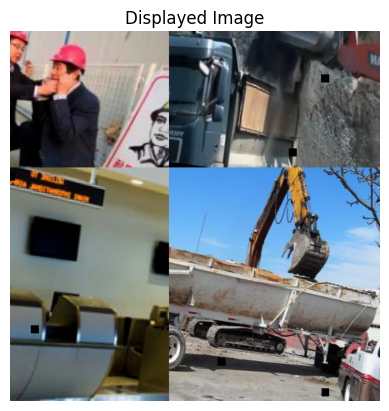

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image
image_path = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/-1680-_png_jpg.rf.aac88b5b6fa0becf6442572810f8cf76.jpg'

# Open and display the image
def display_image(image_path):
    try:
        img = Image.open(image_path)  # Open the image
        plt.imshow(img)  # Display the image using matplotlib
        plt.axis('off')  # Hide the axes for a cleaner look
        plt.title('Displayed Image')  # Optional title
        plt.show()  # Show the plot
    except Exception as e:
        print(f"Error: {e}")

# Call the function to display the image
display_image(image_path)


In [ ]:
import os
import pandas as pd

# Define the path to the images directory
image_dir = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images'

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Create a pandas DataFrame with the file names or full paths
image_data = pd.DataFrame({
    'image_path': [os.path.join(image_dir, img) for img in image_files]
})

# Display the DataFrame
print(image_data.head())

                                          image_path
0  /kaggle/input/construction-site-safety-image-d...
1  /kaggle/input/construction-site-safety-image-d...
2  /kaggle/input/construction-site-safety-image-d...
3  /kaggle/input/construction-site-safety-image-d...
4  /kaggle/input/construction-site-safety-image-d...


In [ ]:
image_data.shape

(2605, 1)

In [ ]:
import os
import pandas as pd

# Define the path to the labels directory
label_dir = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/labels'

# Initialize an empty list to store the annotation data
annotations = []

# Iterate through each label file
for label_file in os.listdir(label_dir):
    # Construct the full file path
    label_path = os.path.join(label_dir, label_file)

    # Read the contents of the label file
    with open(label_path, 'r') as file:
        for line in file:
            # Split the line into parts and add to annotations
            annotations.append([label_file, *line.strip().split()])

# Create a DataFrame from the annotations
annotations_df = pd.DataFrame(annotations, columns=['label_file', 'class_id', 'x_center', 'y_center', 'width', 'height'])
annotations_df.head()

,label_file,class_id,x_center,y_center,width,height
0,youtube-270_jpg.rf.9ae5283f885f67c55f351ac2d03...,9,0.56171875,0.0234375,0.0578125,0.046875
1,youtube-270_jpg.rf.9ae5283f885f67c55f351ac2d03...,5,0.20703125,0.1703125,0.0328125,0.0859375
2,youtube-270_jpg.rf.9ae5283f885f67c55f351ac2d03...,7,0.21171875,0.165625,0.0140625,0.03125
3,youtube-270_jpg.rf.9ae5283f885f67c55f351ac2d03...,8,0.2125,0.26953125,0.425,0.5390625
4,youtube-270_jpg.rf.9ae5283f885f67c55f351ac2d03...,4,0.8,0.178125,0.4,0.35625


In [ ]:
annotations_df.shape

(36895, 6)

In [ ]:
import pandas as pd
import os

# Define paths
INPUT_DIR = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data'
IMAGE_DIR = {'train': os.path.join(INPUT_DIR, 'train', 'images'),
             'valid': os.path.join(INPUT_DIR, 'valid', 'images'),
             'test': os.path.join(INPUT_DIR, 'test', 'images')}

LABEL_DIR = {'train': os.path.join(INPUT_DIR, 'train', 'labels'),
             'valid': os.path.join(INPUT_DIR, 'valid', 'labels'),
             'test': os.path.join(INPUT_DIR, 'test', 'labels')}

# Class names (replace as necessary)
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest',
           'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

def get_image_label_dataframe(mode):
    image_paths = []
    image_labels = []

    # Iterate over label files
    for label_file in os.listdir(LABEL_DIR[mode]):
        # Get image file name corresponding to label
        img_file = label_file.replace('.txt', '.jpg')
        img_path = os.path.join(IMAGE_DIR[mode], img_file)

        # Read label file
        with open(os.path.join(LABEL_DIR[mode], label_file), 'r') as f:
            labels = f.readlines()

        # Get class IDs from the label file
        class_ids = [int(line.split()[0]) for line in labels]

        # Map class IDs to class names
        class_names = [classes[class_id] for class_id in class_ids]

        # Store image path and associated labels
        image_paths.append(img_path)
        image_labels.append(class_names)

    # Create DataFrame
    df = pd.DataFrame({
        'Image_Path': image_paths,
        'Labels': image_labels
    })

    return df

# Create DataFrames for train, valid, and test
train_df = get_image_label_dataframe('train')
valid_df = get_image_label_dataframe('valid')
test_df = get_image_label_dataframe('test')

# Combine all into a single DataFrame
df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

# Display the DataFrame
print(df.head())


                                          Image_Path  \
0  /kaggle/input/construction-site-safety-image-d...   
1  /kaggle/input/construction-site-safety-image-d...   
2  /kaggle/input/construction-site-safety-image-d...   
3  /kaggle/input/construction-site-safety-image-d...   
4  /kaggle/input/construction-site-safety-image-d...   

                                              Labels  
0  [vehicle, Person, Safety Vest, machinery, NO-S...  
1  [machinery, Safety Cone, Safety Cone, Safety C...  
2  [machinery, machinery, Person, Safety Vest, Sa...  
3  [Mask, NO-Safety Vest, Person, Mask, NO-Safety...  
4  [Safety Cone, Safety Cone, Safety Cone, machin...  


In [ ]:
train_df.head()

,Image_Path,Labels
0,/kaggle/input/construction-site-safety-image-d...,"[vehicle, Person, Safety Vest, machinery, NO-S..."
1,/kaggle/input/construction-site-safety-image-d...,"[machinery, Safety Cone, Safety Cone, Safety C..."
2,/kaggle/input/construction-site-safety-image-d...,"[machinery, machinery, Person, Safety Vest, Sa..."
3,/kaggle/input/construction-site-safety-image-d...,"[Mask, NO-Safety Vest, Person, Mask, NO-Safety..."
4,/kaggle/input/construction-site-safety-image-d...,"[Safety Cone, Safety Cone, Safety Cone, machin..."


In [ ]:
train_df.shape

(2605, 2)

In [ ]:
train_df.isnull().sum()

Image_Path    0
Labels        0
dtype: int64

In [ ]:
test_df.head()

,Image_Path,Labels
0,/kaggle/input/construction-site-safety-image-d...,"[NO-Mask, Safety Vest, Hardhat, Person]"
1,/kaggle/input/construction-site-safety-image-d...,"[NO-Safety Vest, NO-Safety Vest, NO-Safety Ves..."
2,/kaggle/input/construction-site-safety-image-d...,"[Mask, NO-Hardhat, NO-Safety Vest, Person]"
3,/kaggle/input/construction-site-safety-image-d...,[]
4,/kaggle/input/construction-site-safety-image-d...,"[Hardhat, Mask, Safety Vest, Person]"


In [ ]:
test_df.shape

(82, 2)

In [ ]:
test_df.isnull().sum()

Image_Path    0
Labels        0
dtype: int64

In [ ]:
valid_df.head()

,Image_Path,Labels
0,/kaggle/input/construction-site-safety-image-d...,"[machinery, machinery, NO-Safety Vest, Person]"
1,/kaggle/input/construction-site-safety-image-d...,[machinery]
2,/kaggle/input/construction-site-safety-image-d...,"[Person, Hardhat, NO-Safety Vest, Mask]"
3,/kaggle/input/construction-site-safety-image-d...,"[Hardhat, Person, NO-Safety Vest, NO-Safety Vest]"
4,/kaggle/input/construction-site-safety-image-d...,"[NO-Safety Vest, NO-Mask, Hardhat, Person]"


In [ ]:
valid_df.shape

(114, 2)

In [ ]:
valid_df.isnull().sum()

Image_Path    0
Labels        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  2801 non-null   object
 1   Labels      2801 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [ ]:
df.describe()

,Image_Path,Labels
count,2801,2801
unique,2801,2630
top,/kaggle/input/construction-site-safety-image-d...,[]
freq,1,24


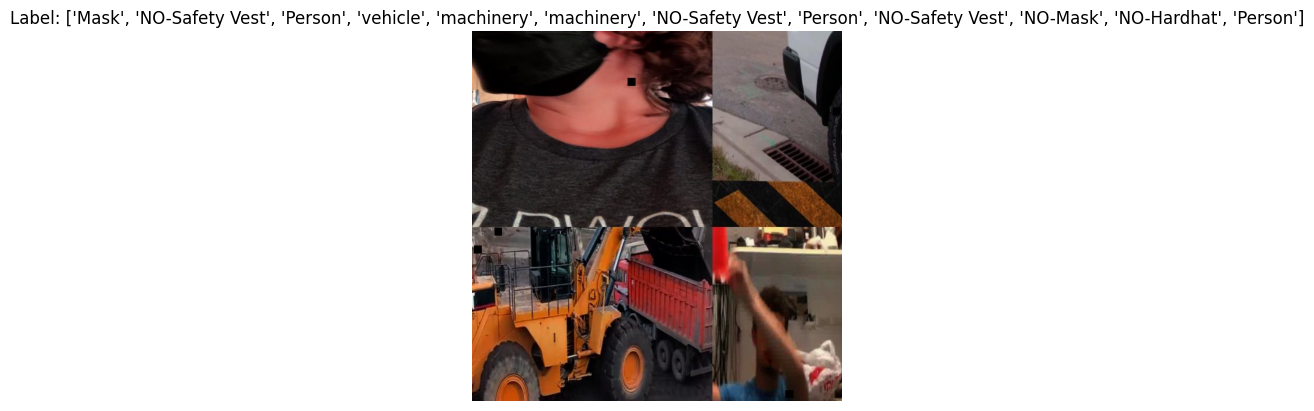

In [ ]:
def display_image_and_label(df, index):
    image_path = df.loc[index, 'Image_Path']  # Get the image path
    label = df.loc[index, 'Labels']  # Get the label

    # Open the image
    img = Image.open(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off the axis
    plt.title(f'Label: {label}')  # Display the label as title
    plt.show()

# Example: Display the first image and label
display_image_and_label(df, 5)

In [ ]:
num_classes=len(classes)

class_idx = {str(i): classes[i] for i in range(num_classes)}
class_stat = {}
data_len = {}
class_info=[]
for mode in ['train', 'valid', 'test']:
    class_count = {cls: 0 for cls in classes}
    path = os.path.join(INPUT_DIR, mode, 'labels')

    # Iterate through files in the label directory
    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

        # Increment the class count for each unique class in the file
        unique_classes = {line[0] for line in lines}
        for cls in unique_classes:
            class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count
    class_info.append({'Mode': mode, **class_count, 'Data_Volume': data_len[mode]})
dataset_stats_df = pd.DataFrame(class_info)
with pd.option_context('display.max_columns', None):
    display(dataset_stats_df)


,Mode,Hardhat,Mask,NO-Hardhat,NO-Mask,NO-Safety Vest,Person,Safety Cone,Safety Vest,machinery,vehicle,Data_Volume
0,train,1314,1096,1380,1531,1864,2526,631,1319,2101,744,2605
1,valid,42,19,37,44,56,84,13,28,26,16,114
2,test,30,16,25,30,36,59,8,22,22,15,82


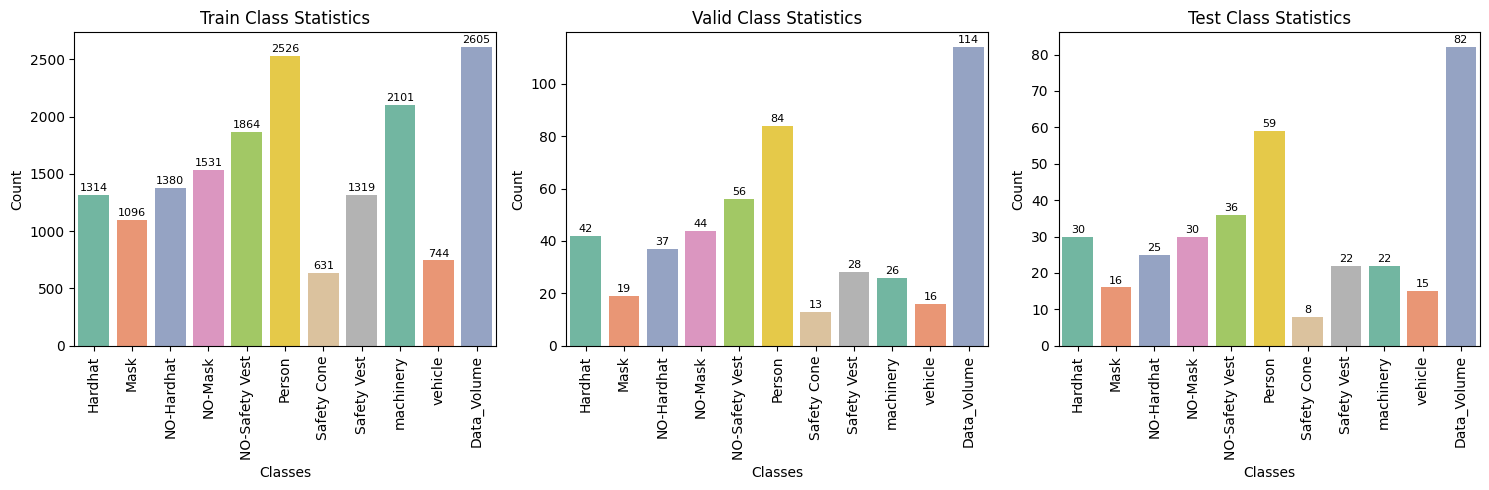

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Побудова вертикальних стовпчикових діаграм для кожного режиму в підграфіках
for i, mode in enumerate(['train', 'valid', 'test']):
    subset = dataset_stats_df[dataset_stats_df['Mode'] == mode].drop(columns='Mode')
    subset = subset.melt(var_name='Classes', value_name='Count')  # Перетворення на довгий формат

    sns.barplot(
        data=subset,
        x='Classes',
        y='Count',
        ax=axes[i],
        palette='Set2'
    )

    axes[i].set_title(f'{mode.capitalize()} Class Statistics')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

    # Додаємо підписи над кожним стовпчиком
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()